<a href="https://colab.research.google.com/github/Swapnadeepgit/Analytics/blob/main/ESDPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *CROP PRODUCTION : EXPLORATORY DATA ANALYSIS AND ML*

This data refers tom the district wise , season wise and year wise crop covered area and production. The data is being used to study and analyse crop production to district/state/country.Agro-climatic zone wise performance and high yield production order for crops , crop growing pattern and diversification.The system is also a vital souirce for formulating crop related schemes and assesing their impacts.

RELEASED BY: MINISTRY OF AGRICULTURE AND FARMER WALFARE.
SECTOR AGRICULTURE


# Data Quality and Description
Size of Data :246091 rows and 7 coloumns.
No extra noise in  data , no duplicate found .
There are 3730 missing values in the production coloumn.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#importing datasets
pro=pd.read_csv('/content/apy (1).csv')
pro.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
pro.shape

(153177, 7)

DETERMING THE FEATURES OF THE DATASET AND CONVERTING THE DEPENDENT AND INDEPENDENT FEATURES INTO ARRAYS:

In [ ]:
pro.info()
pro.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153177 entries, 0 to 153176
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     153177 non-null  object 
 1   District_Name  153177 non-null  object 
 2   Crop_Year      153177 non-null  int64  
 3   Season         153177 non-null  object 
 4   Crop           153176 non-null  object 
 5   Area           153176 non-null  float64
 6   Production     150499 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ MB


Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
x=pro.iloc[:,:-1].values
y=pro.iloc[:,6].values

In [ ]:
#FIXING THE MISSING VALUES
pro.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                1
Area                1
Production       2678
dtype: int64

In [ ]:
pro.replace("",np.nan,inplace=True)
new=pro[(pro.Production.isnull())].reset_index()
new.head()


,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
1,51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
2,623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
3,630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
4,698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Crop_Year'].plot(kind='hist', bins=20, title='Crop_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('State_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('District_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Crop').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='Crop_Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Crop_Year', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('State_Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='State_Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('District_Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='District_Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Season')):
  _plot_series(series, series_name, i)
  fig.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Crop')):
  _plot_series(series, series_name, i)
  fig.legend(title='Crop', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Area')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Crop_Year'].plot(kind='line', figsize=(8, 4), title='Crop_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Area'].plot(kind='line', figsize=(8, 4), title='Area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['District_Name'].value_counts()
    for x_label, grp in _df_16.groupby('State_Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('State_Name')
_ = plt.ylabel('District_Name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Season'].value_counts()
    for x_label, grp in _df_17.groupby('District_Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('District_Name')
_ = plt.ylabel('Season')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Crop'].value_counts()
    for x_label, grp in _df_18.groupby('Season')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Season')
_ = plt.ylabel('Crop')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['State_Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='State_Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['District_Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='District_Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='Season', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Crop'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='Crop', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
array_new=new.iloc[:,:].values
array_prod=pro.iloc[:,:].values


We replace the missing values with "NAN".
Making a new dataframe with only the nan values of production.

In [ ]:
meandf = pro.groupby(['State_Name','Crop'])['Production'].mean().reset_index()
meandf.head()

,State_Name,Crop,Production
0,Andaman and Nicobar Islands,Arecanut,2825.635882
1,Andaman and Nicobar Islands,Arhar/Tur,52.000000
2,Andaman and Nicobar Islands,Banana,6089.040625
3,Andaman and Nicobar Islands,Black pepper,51.750000
4,Andaman and Nicobar Islands,Cashewnut,93.599444


In [ ]:
#encoding the categorical values by LabelEncoder for all coloumns
le=LabelEncoder()
for i in pro.columns:
  if pro[i].dtype=='object':
    pro[i]=le.fit_transform(pro[i])


In [ ]:
#dividing the data into train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#feature scalar
sc_x=StandardScaler()


INFERENCES : IN THIS STEP WE BASICALLY PLOT GRAPHS AND DRAW INFERENCES FROM THEM

([<matplotlib.patches.Wedge at 0x7bbd3a278a30>,
 [Text(1.0785152837174155, 0.21634413046797213, 'Maize'),
  Text(0.9239045119325408, 0.5969928415238274, 'Rice'),
  Text(0.6642490354693381, 0.8767971366730472, 'Sunflower'),
  Text(0.36082406729778277, 1.0391371384272075, 'Jowar'),
  Text(0.054949802729548775, 1.0986266514061926, 'Dry chillies'),
  Text(-0.24657280656737482, 1.0720083260224653, 'Horse-gram'),
  Text(-0.5231028085667955, 0.9676587475290712, 'Groundnut'),
  Text(-0.7536837278636986, 0.8012245867130379, 'Ragi'),
  Text(-0.9279673678168116, 0.5906577386838664, 'Onion'),
  Text(-1.0356002497380925, 0.3708532361223244, 'Moong(Green Gram)'),
  Text(-1.0853104371326652, 0.1791682311429768, 'Urad'),
  Text(-1.0999386651893905, 0.011616058771454342, 'Coconut '),
  Text(-1.090824556033009, -0.1417807742798336, 'Gram'),
  Text(-1.0617167461599837, -0.2876761215733012, 'Cotton(lint)'),
  Text(-1.01401481116434, -0.4263495780921427, 'Arhar/Tur'),
  Text(-0.9484561764377389, -0.5571632

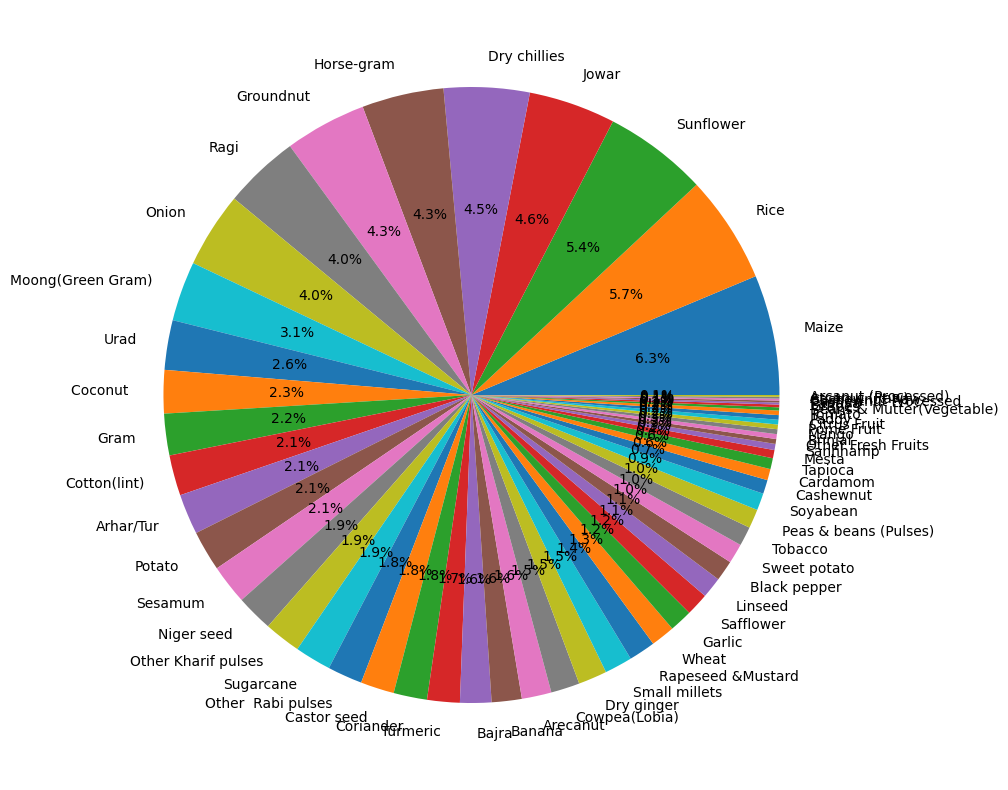

In [ ]:
#plotting pie chart on karnataka state and calculate distn of crops
plt.figure(figsize=(10,10))
plt.pie(pro[pro['State_Name']=='Karnataka']['Crop'].value_counts(),labels=pro[pro['State_Name']=='Karnataka']['Crop'].value_counts().index,autopct='%1.1f%%')

<Axes: xlabel='State_Name', ylabel='Production'>

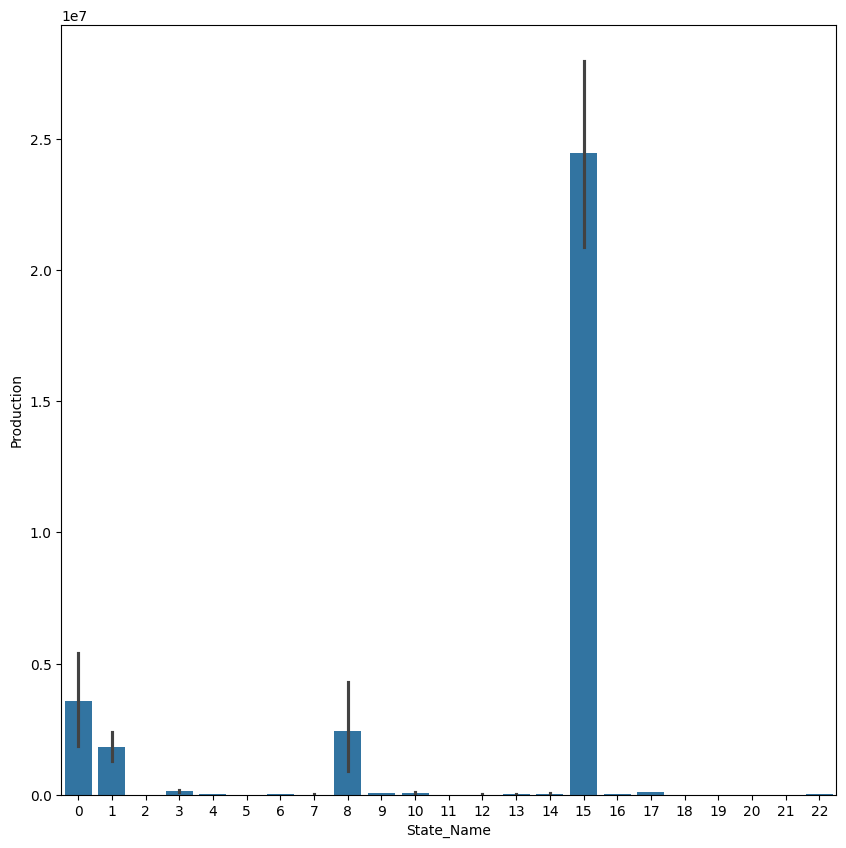

In [ ]:
#bar graph for state wise production
plt.figure(figsize=(10,10))
sns.barplot(x='State_Name',y='Production',data=pro)

<Axes: xlabel='Crop_Year', ylabel='Production'>

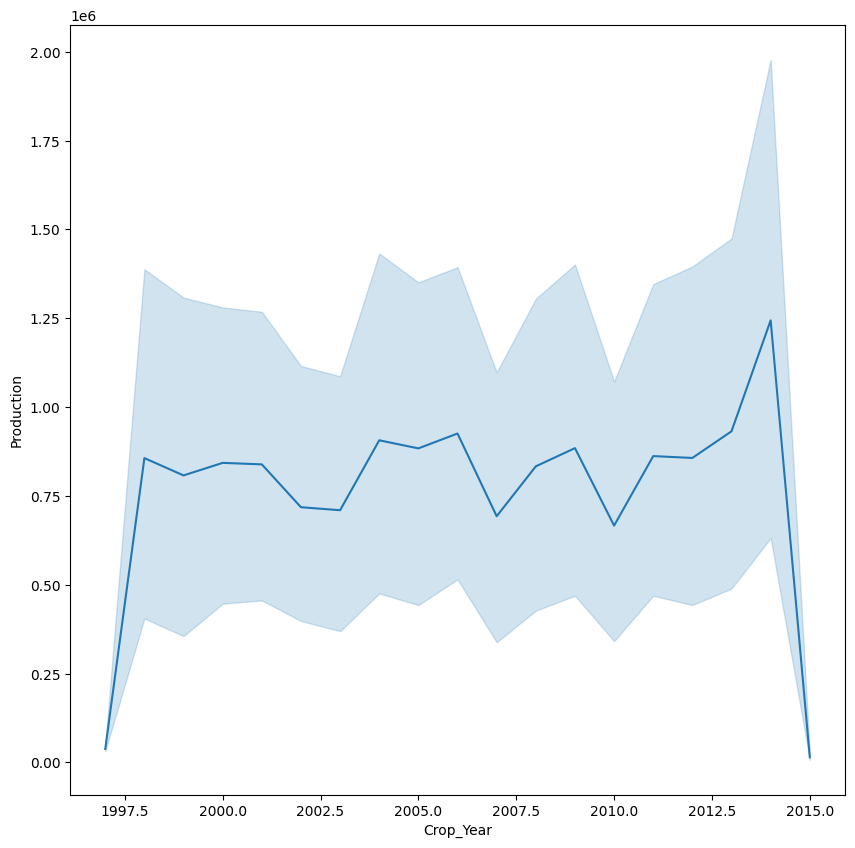

In [ ]:
#line chart for crop production at different year
plt.figure(figsize=(10,10))
sns.lineplot(x='Crop_Year',y='Production',data=pro)

<Axes: xlabel='State_Name', ylabel='Production'>

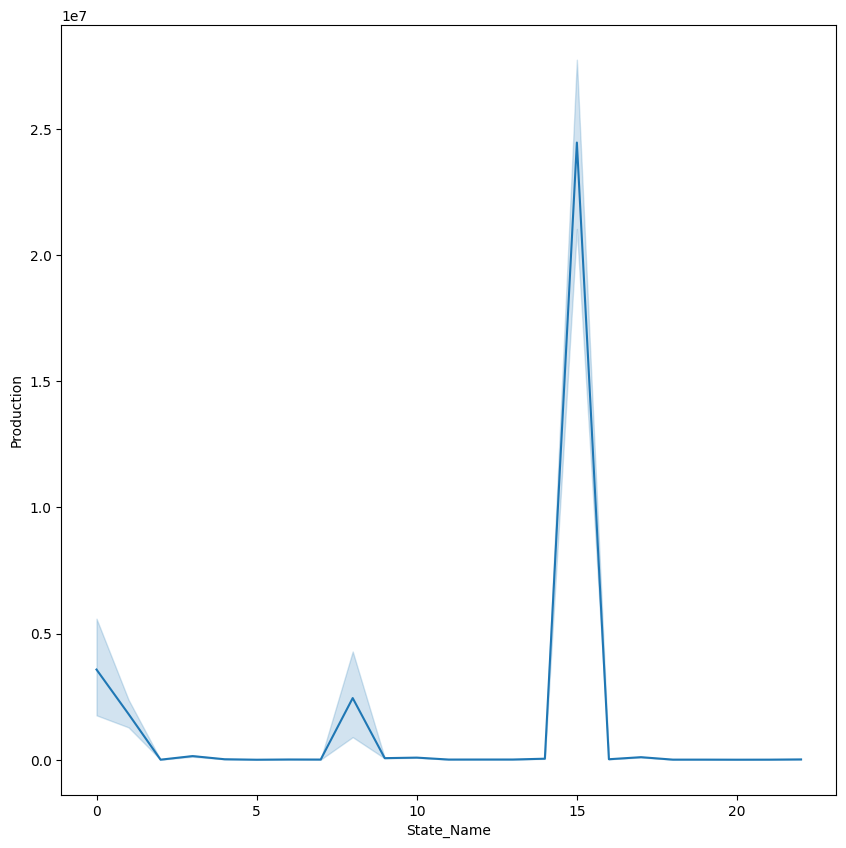

In [ ]:
#linechart of production state wise
plt.figure(figsize=(10,10))
sns.lineplot(x='State_Name',y='Production',data=pro)

<Axes: xlabel='State_Name', ylabel='Production'>

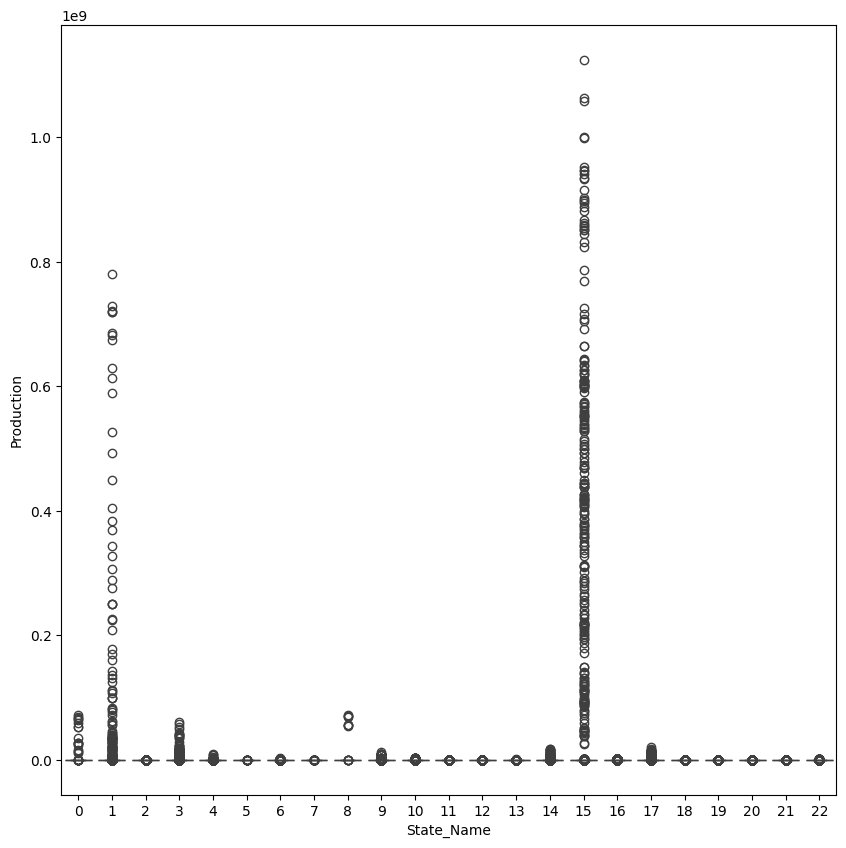

In [41]:
#boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x='State_Name',y='Production',data=pro)

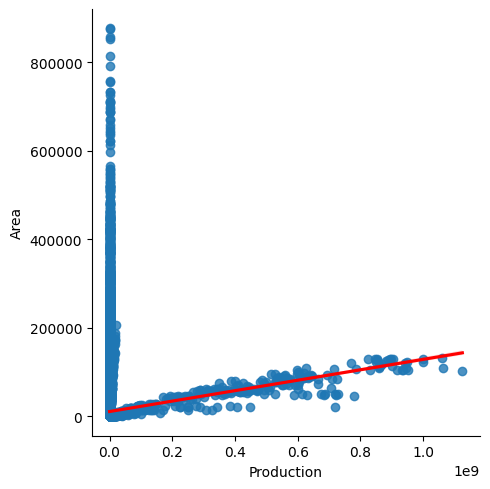

In [44]:
#linear regression plot
sns.lmplot(x='Production',y='Area',data=pro,line_kws={'color':'red'})